In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.5 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# **EDA**

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.shape

(50, 5)

In [ ]:

#NO data is duplicated
df[df.duplicated()]



,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
#correlation analysis
df.corr()

<ipython-input-10-4c574c3a4ca3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
df=df.rename(columns={"R&D Spend":"RDS","Administration":"Adm","Marketing Spend":"MS","State":"ST","Profit":"PF"})
df.head()

,RDS,Adm,MS,ST,PF
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Figure size 6400x9000 with 0 Axes>

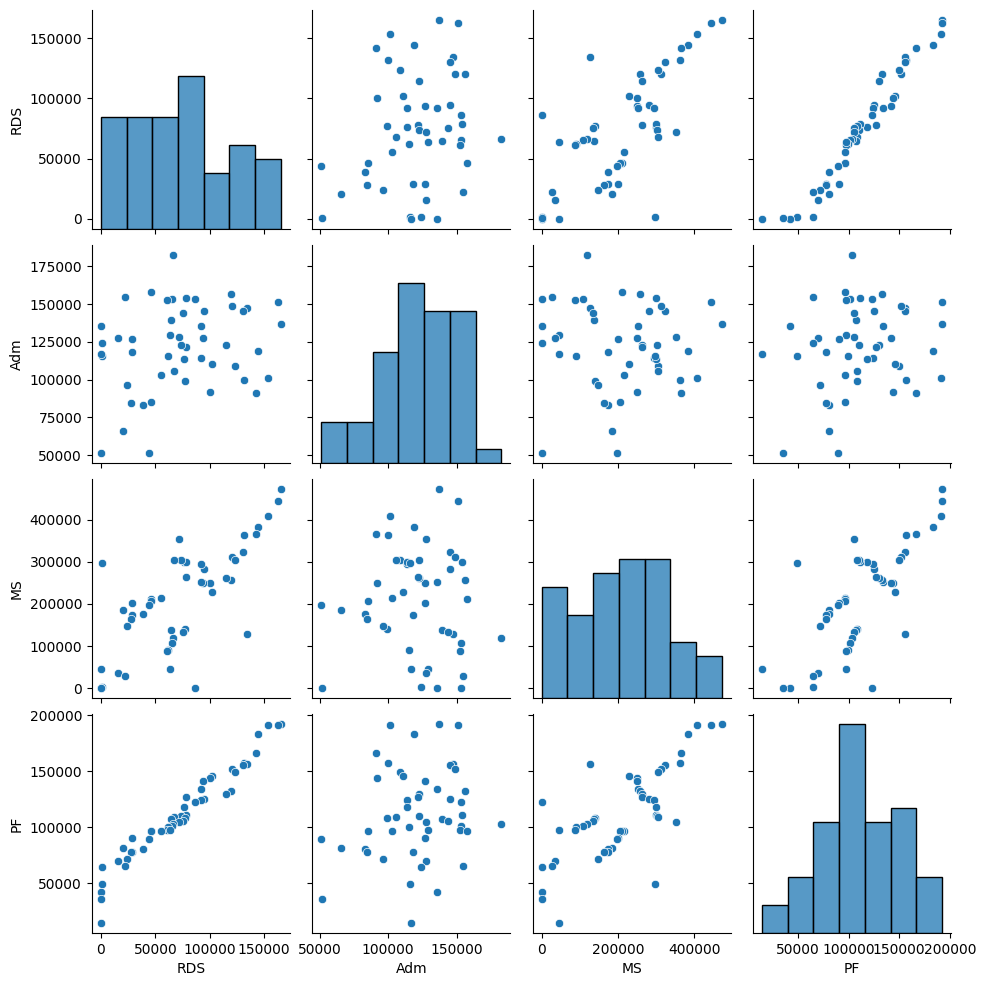

In [ ]:
plt.figure(figsize=(64,90))
sns.pairplot(df)

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

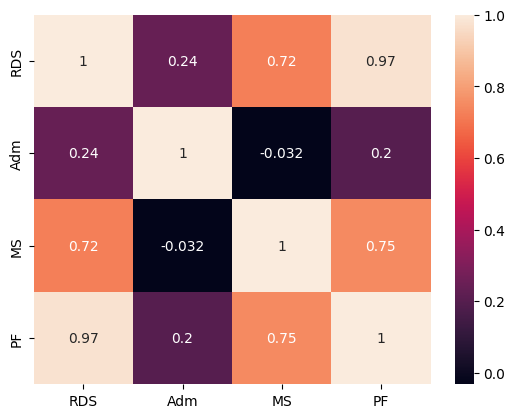

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

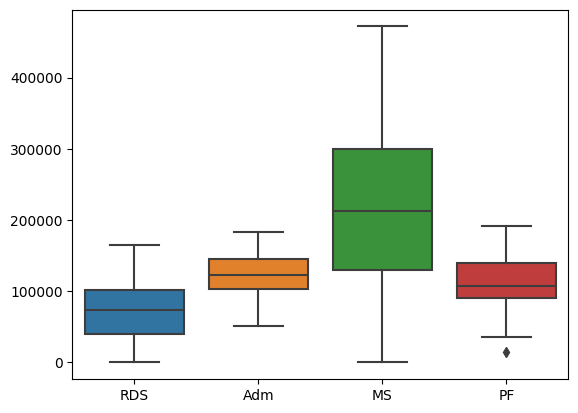

In [ ]:
sns.boxplot(df)

<Axes: >

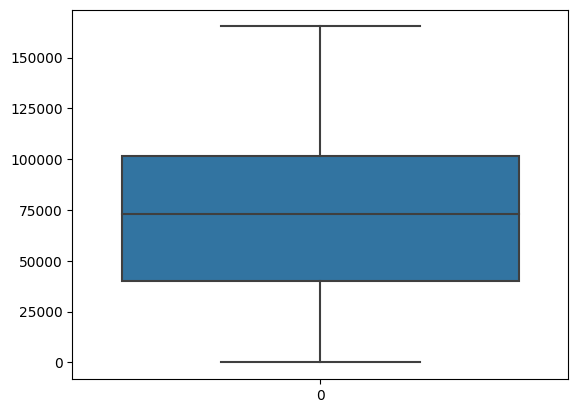

In [ ]:
sns.boxplot(df["RDS"])

<Axes: xlabel='RDS', ylabel='Count'>

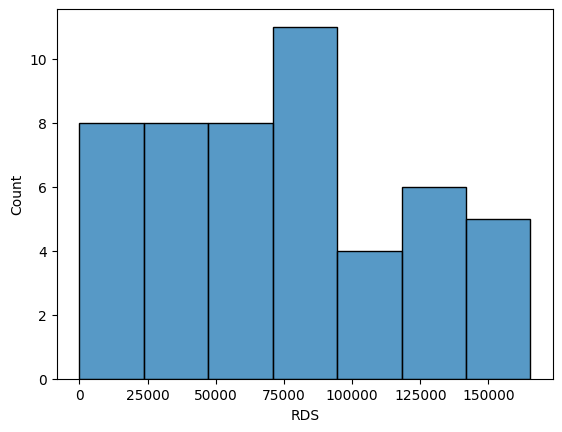

In [ ]:
sns.histplot(df["RDS"])

In [ ]:
df["RDS"].skew()

0.164002172321177

In [ ]:
df["RDS"].kurt()

-0.7614645568424674

In [ ]:
df["RDS"].isna().sum()

0

<ipython-input-22-05604e259659>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["RDS"])


<Axes: xlabel='RDS', ylabel='Density'>

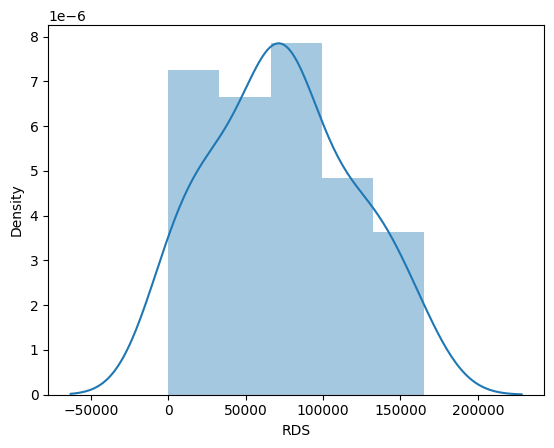

In [ ]:
sns.distplot(df["RDS"])

In [ ]:
df["ST"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df1=df.copy()

In [ ]:
ohe=pd.get_dummies(df1["ST"])

In [ ]:
ohe

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [ ]:
df1=pd.concat([df1,ohe],axis=1)
df1

,RDS,Adm,MS,ST,PF,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df["ST"]=le.fit_transform(df["ST"])
df

,RDS,Adm,MS,ST,PF
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [ ]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
df[["RDS","Adm","MS","ST","PF"]]=se.fit_transform(df[["RDS","Adm","MS","ST","PF"]])
df

,RDS,Adm,MS,ST,PF
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740
5,1.279800,-0.776239,1.254210,1.212678,1.127250
6,1.340066,0.932147,-0.688150,-1.212678,1.105481
7,1.245057,0.871980,0.932186,0.000000,1.096210
8,1.030369,0.986952,0.830887,1.212678,1.007470
9,1.091819,-0.456640,0.776107,-1.212678,0.946022


In [ ]:
df.head()

,RDS,Adm,MS,ST,PF
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df[["RDS","Adm","MS","ST","PF"]]=ms.fit_transform(df[["RDS","Adm","MS","ST","PF"]])
df

<Axes: >

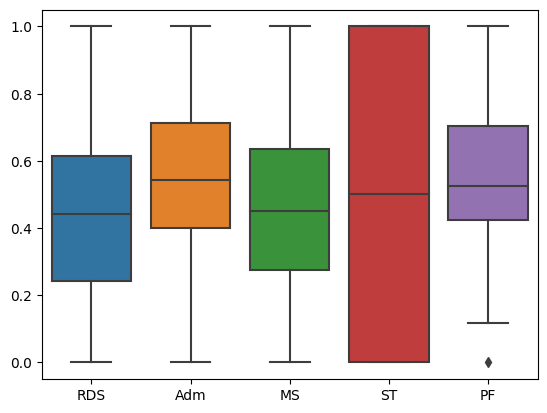

In [ ]:
sns.boxplot(df)

In [ ]:
# IQR handling for PF

q1 = np.percentile(df["PF"],25)
q3 = np.percentile(df["PF"],75)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr

In [ ]:
df[df["PF"]<ub]

,RDS,Adm,MS,ST,PF
0,1.000000,0.651744,1.000000,1.0,1.000000
1,0.983359,0.761972,0.940893,0.0,0.997355
2,0.927985,0.379579,0.864664,0.5,0.993178
3,0.873136,0.512998,0.812235,1.0,0.947292
4,0.859438,0.305328,0.776136,0.5,0.853171
5,0.797566,0.369448,0.769126,1.0,0.801382
6,0.814128,0.730161,0.270710,0.0,0.796490
7,0.788018,0.717457,0.686493,0.5,0.794407
8,0.729018,0.741733,0.660500,1.0,0.774468
9,0.745906,0.436929,0.646443,0.0,0.760661


In [ ]:
df["PF"][df["PF"]>ub]=ub
df["PF"][df["PF"]<lb]=lb

<Axes: >

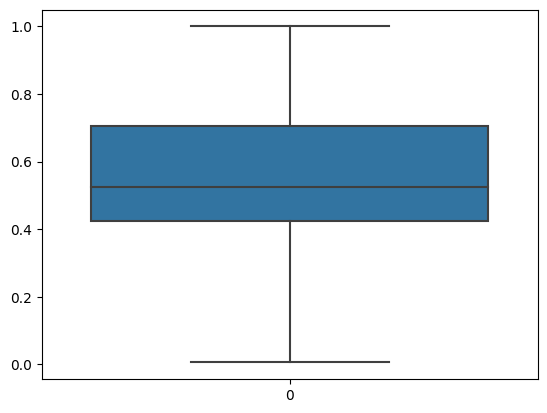

In [ ]:
sns.boxplot(df["PF"])

<Axes: >

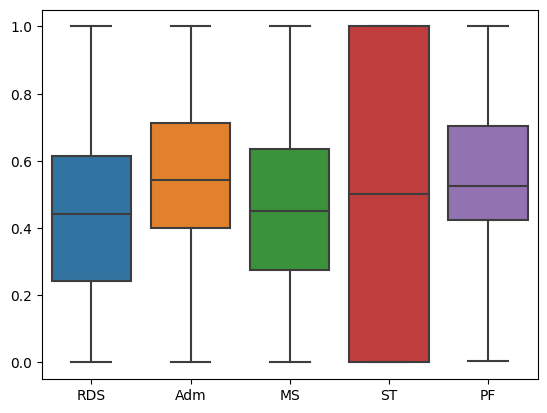

In [ ]:
sns.boxplot(df)

In [ ]:
df["ST"].value_counts()

1.0    17
0.0    17
0.5    16
Name: ST, dtype: int64

<Axes: xlabel='ST', ylabel='count'>

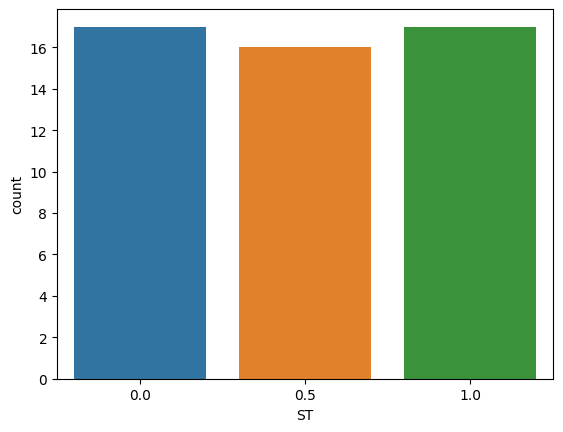

In [ ]:
sns.countplot(x="ST",data=df)

In [ ]:
df2=df["ST"].value_counts().rename_axis('ST').reset_index(name="Counts")

In [ ]:
df2

,ST,Counts
0,1.0,17
1,0.0,17
2,0.5,16


<Axes: xlabel='ST', ylabel='Counts'>

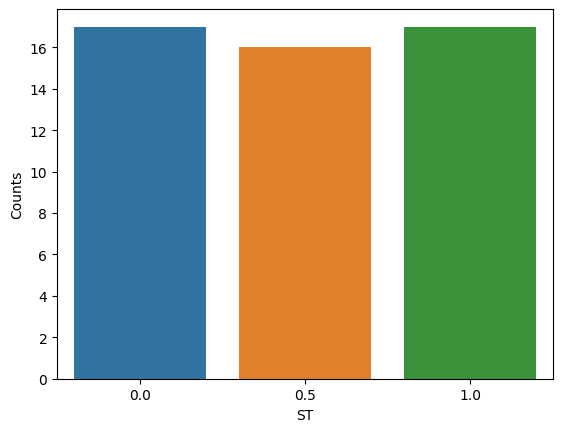

In [ ]:
sns.barplot(y=df2["Counts"],x=df2["ST"])

([<matplotlib.patches.Wedge at 0x7f71a655cc10>,
 [Text(0.5299290306818474, 0.9639373540021144, '1.0'),
  Text(-1.0978293989430645, -0.069069608485279, '0.0'),
  Text(0.5894094953465407, -0.9287607048079373, '0.5')])

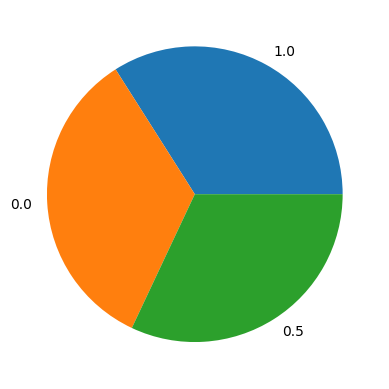

In [ ]:
plt.pie(df2["Counts"],labels=df2["ST"])

In [ ]:

import sweetviz as sv
sv_report = sv.analyze(df)
sv_report.show_html("eda_report2.html")

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# building the Model

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

model=smf.ols('PF~RDS+Adm+MS+ST',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           6.10e-29
Time:                        17:17:04   Log-Likelihood:                 79.406
No. Observations:                  50   AIC:                            -148.8
Df Residuals:                      45   BIC:                            -139.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1925      0.026      7.494      0.000       0.141       0.244
RDS            0.7497      0.042     17.749      0.000       0.665       0.835
Adm           -0.0198      0.038     -0.522      0.604      -0.096       0.056
MS             0.0722      0.044      1.648      0.106      -0.016       0.160
ST            -0.0005      0.018     -0.030      0.976      -0.037       0.036
==============================================================================
Omnibus:                       13.368   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.943
Skew:                          -0.888   Prob(JB):                     0.000127
Kurtosis:                       5.336   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.head()

,RDS,Adm,MS,ST,PF
0,1.000000,0.651744,1.000000,1.0,1.000000
1,0.983359,0.761972,0.940893,0.0,0.997355
2,0.927985,0.379579,0.864664,0.5,0.993178
3,0.873136,0.512998,0.812235,1.0,0.947292
4,0.859438,0.305328,0.776136,0.5,0.853171


In [ ]:
model2=smf.ols('PF~Adm',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.018
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.162
Time:                        17:19:01   Log-Likelihood:                 4.7958
No. Observations:                  50   AIC:                            -5.592
Df Residuals:                      48   BIC:                            -1.768
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4343      0.086      5.038      0.000       0.261       0.608
Adm            0.2135      0.150      1.421      0.162      -0.089       0.516
==============================================================================
Omnibus:                        0.132   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.133
Skew:                           0.102   Prob(JB):                        0.936
Kurtosis:                       2.850   Cond. No.                         6.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3=smf.ols('PF~MS',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.97
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           4.30e-10
Time:                        17:20:05   Log-Likelihood:                 24.262
No. Observations:                  50   AIC:                            -44.52
Df Residuals:                      48   BIC:                            -40.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2556      0.043      5.916      0.000       0.169       0.342
MS             0.6542      0.084      7.808      0.000       0.486       0.823
==============================================================================
Omnibus:                        4.368   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.827
Skew:                          -0.330   Prob(JB):                        0.148
Kurtosis:                       4.184   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4=smf.ols('PF~ST',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4977
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.484
Time:                        17:24:00   Log-Likelihood:                 4.0239
No. Observations:                  50   AIC:                            -4.048
Df Residuals:                      48   BIC:                           -0.2237
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5206      0.051     10.279      0.000       0.419       0.622
ST             0.0551      0.078      0.705      0.484      -0.102       0.212
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.152
Skew:                           0.054   Prob(JB):                        0.927
Kurtosis:                       2.752   Cond. No.                         3.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.pvalues


Intercept    1.021157e-13
ST           4.839206e-01
dtype: float64

In [ ]:
model3.pvalues


Intercept    3.363205e-07
MS           4.299398e-10
dtype: float64

In [ ]:
model4.pvalues

Intercept    1.021157e-13
ST           4.839206e-01
dtype: float64

In [ ]:
model5=smf.ols('PF~Adm+MS+ST',data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.16
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.54e-09
Time:                        17:25:40   Log-Likelihood:                 27.419
No. Observations:                  50   AIC:                            -46.84
Df Residuals:                      46   BIC:                            -39.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1157      0.071      1.634      0.109      -0.027       0.258
Adm            0.2387      0.098      2.443      0.018       0.042       0.435
MS             0.6577      0.081      8.157      0.000       0.495       0.820
ST             0.0219      0.050      0.437      0.665      -0.079       0.123
==============================================================================
Omnibus:                        6.429   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.473
Skew:                          -0.485   Prob(JB):                       0.0393
Kurtosis:                       4.472   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model6=smf.ols('PF~Adm+ST',data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.241
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.299
Time:                        17:26:24   Log-Likelihood:                 5.0521
No. Observations:                  50   AIC:                            -4.104
Df Residuals:                      47   BIC:                             1.632
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4081      0.095      4.317      0.000       0.218       0.598
Adm            0.2123      0.151      1.405      0.167      -0.092       0.516
ST             0.0539      0.077      0.696      0.490      -0.102       0.210
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.333
Skew:                           0.140   Prob(JB):                        0.847
Kurtosis:                       2.714   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#VIF for Adm

m1=smf.ols('Adm~RDS+MS+ST',data=df).fit()
rs_Adm=m1.rsquared
vif_Adm=1/(1-rs_Adm)
vif_Adm

1.1753153231430187

In [ ]:
#Vif for ST

m1=smf.ols('ST~Adm+RDS+MS',data=df).fit()
rs_ST=m1.rsquared
vif_ST=1/(1-rs_ST)
vif_ST

1.0112807816962477

In [ ]:

#Vif for MS


m1=smf.ols('MS~ST+RDS+Adm',data=df).fit()
rs_MS=m1.rsquared
vif_MS=1/(1-rs_MS)
vif_MS

2.326780136936846

In [ ]:
#vif for RDS

m1=smf.ols('RDS~ST+MS+Adm',data=df).fit()
rs_rds=m1.rsquared
vif_rds=1/(1-rs_rds)
vif_rds

2.481178106641511

In [ ]:
d1={"Variables":['Adm','ST','MS','RDS'],"VIF":[vif_Adm,vif_ST,vif_MS,vif_rds]}

In [ ]:
vif=pd.DataFrame(d1)
vif

,Variables,VIF
0,Adm,1.175315
1,ST,1.011281
2,MS,2.326780
3,RDS,2.481178


## all the VIF values are less than 20 and hence all the variables are taken into **consideration**

In [ ]:
print(model5.aic)
print(model5.rsquared)

-46.837390062519475
0.6117506641324171


# **Test** **for** **Normality**

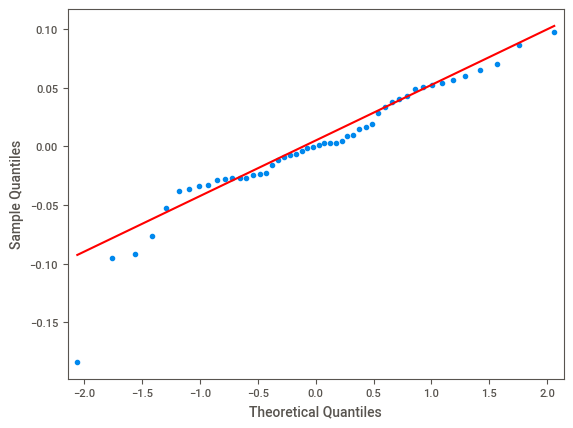

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [ ]:
def standardize1(v):
  eqn=(v-v.mean())/v.std()
  return eqn

Text(0, 0.5, 'Standardized residual values')

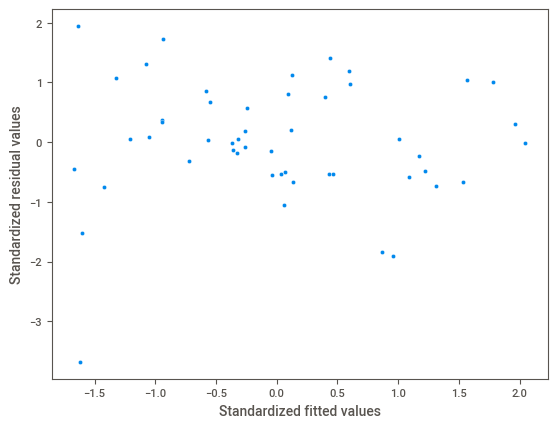

In [ ]:
sns.scatterplot(x=standardize1(model.fittedvalues),y=standardize1(model.resid))
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")

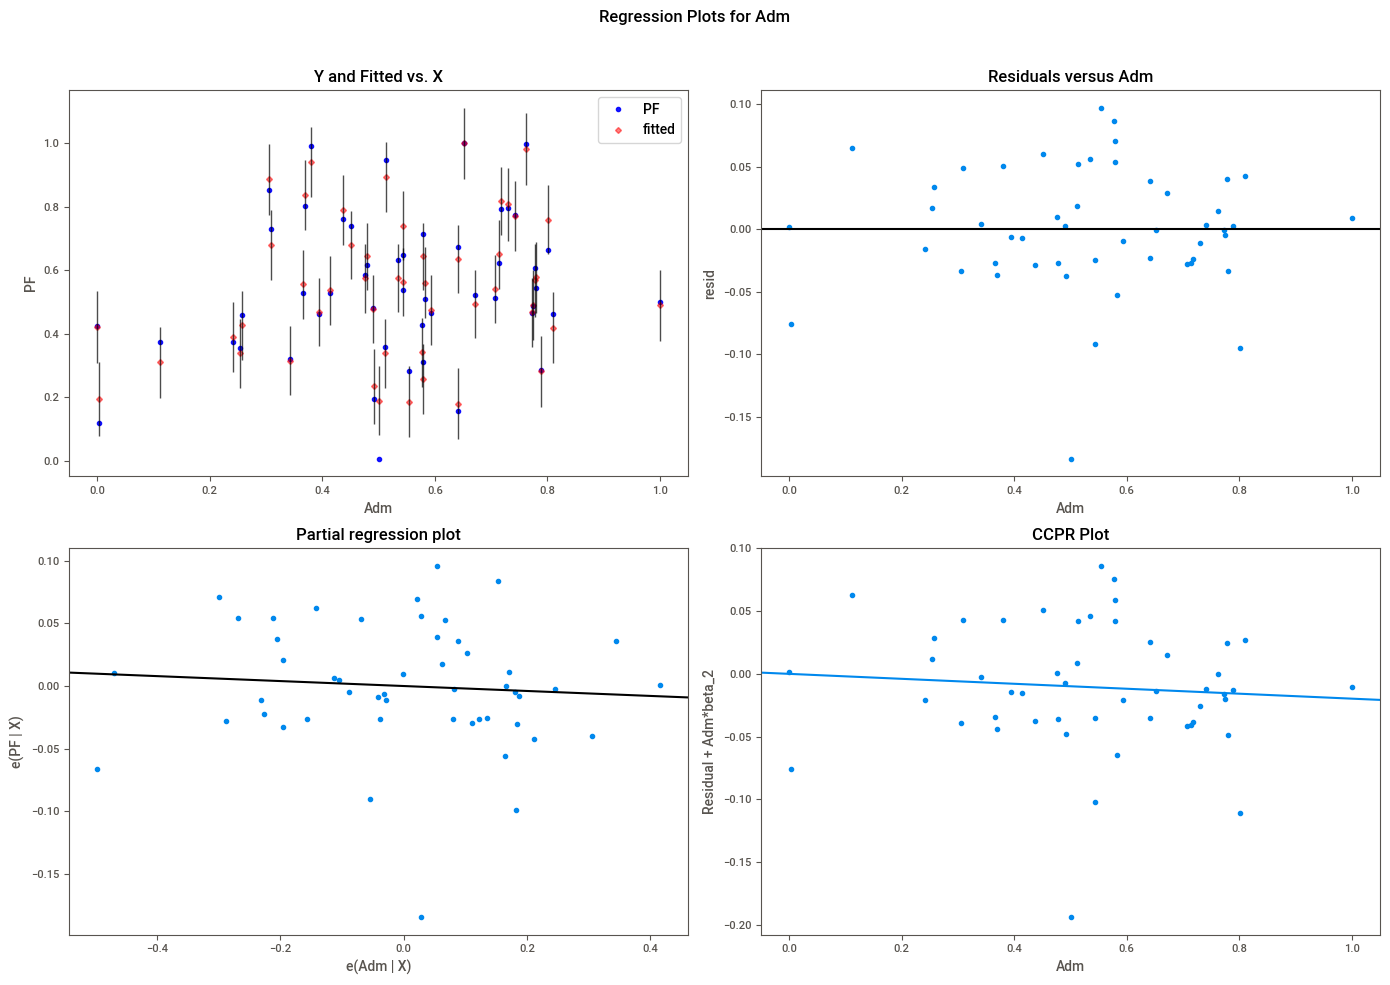

In [ ]:
#residual vs regressors


fig=plt.figure(figsize=(14,10))
fig=sm.graphics.plot_regress_exog(model,"Adm",fig=fig)
plt.show()

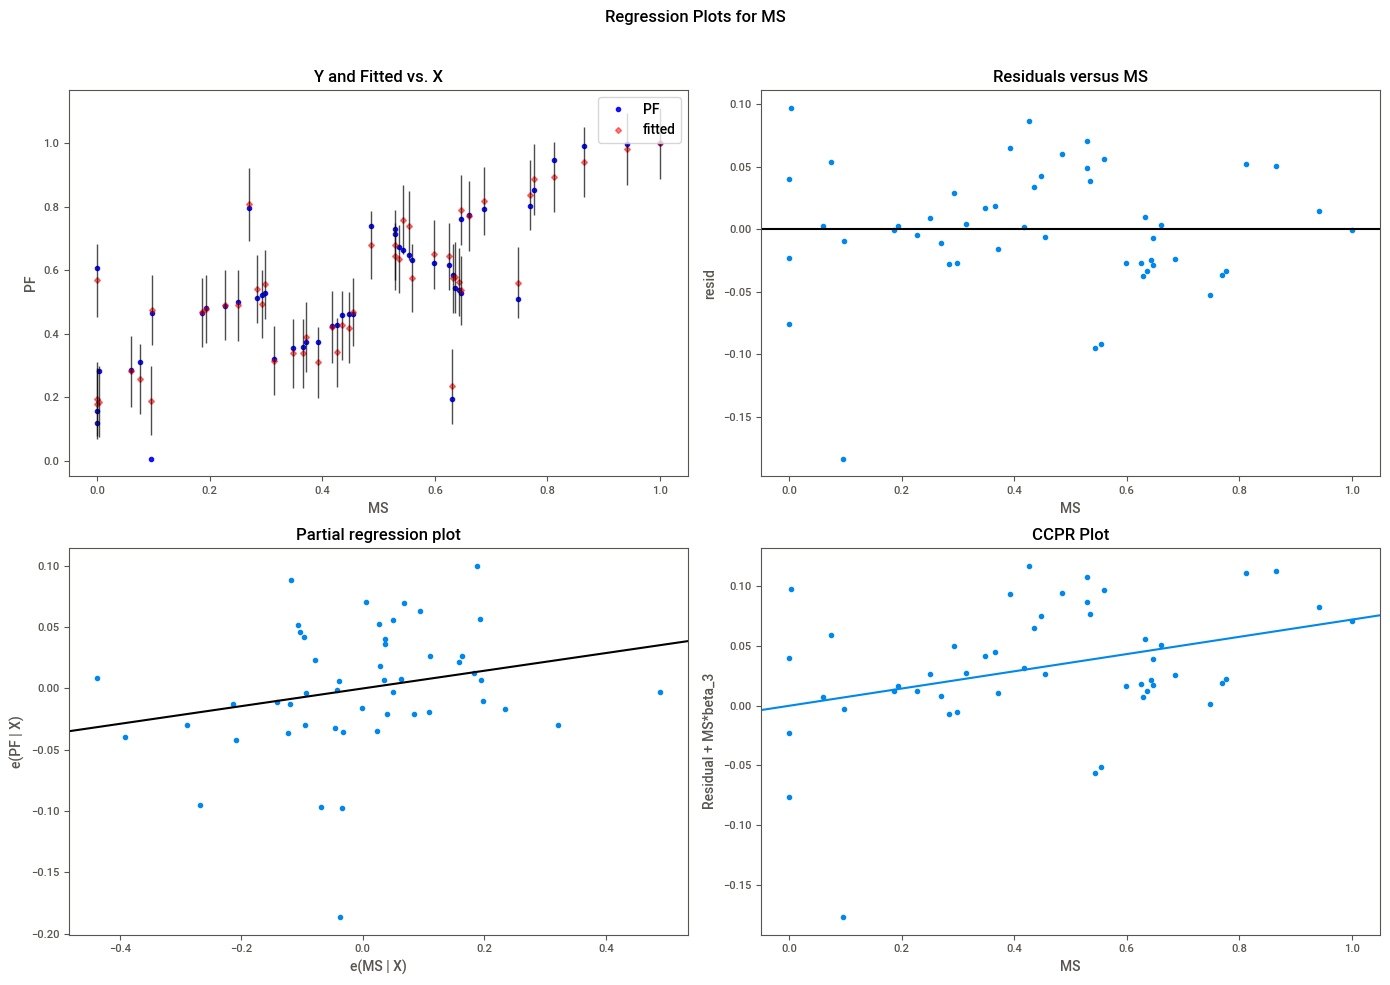

In [ ]:
fig=plt.figure(figsize=(14,10))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

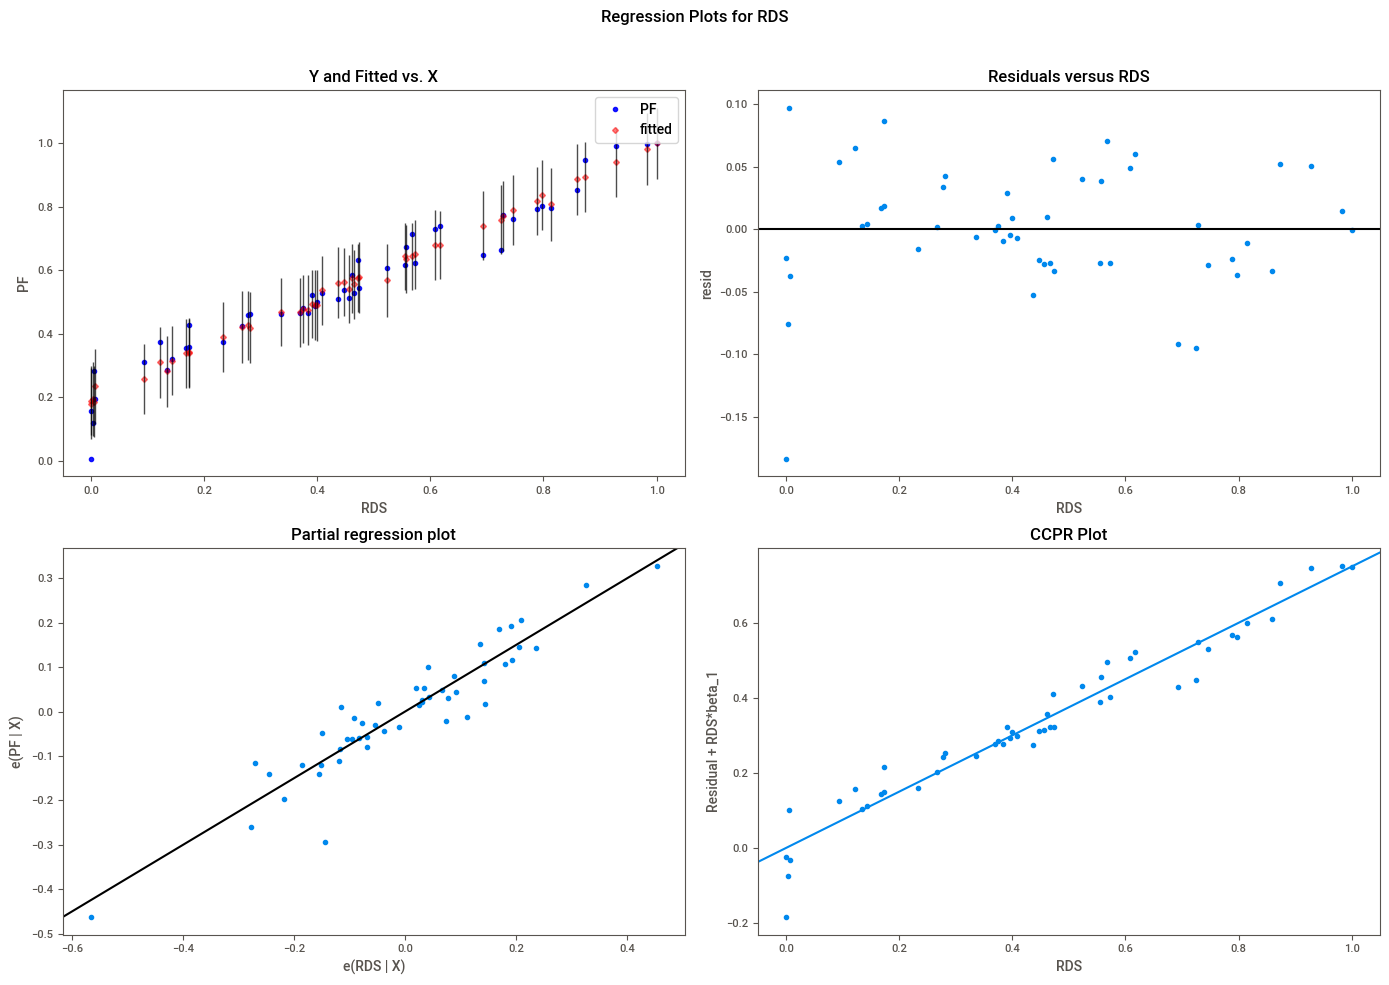

In [ ]:
fig=plt.figure(figsize=(14,10))
fig=sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

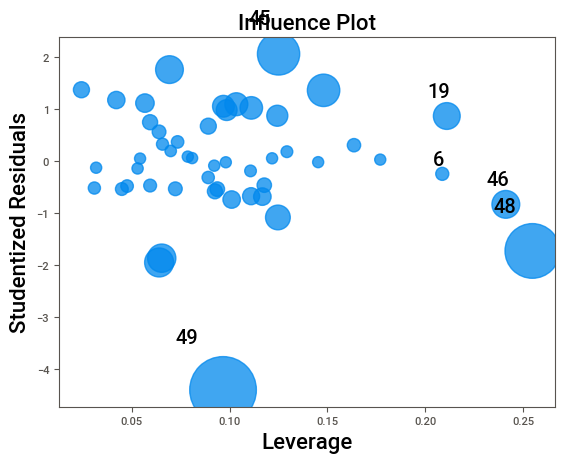

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
df.shape

(50, 5)

In [ ]:
k=df.shape[1]
n=df.shape[0]

leverage_cutoff=3*((k+1)/n)

leverage_cutoff

0.36

In [ ]:
#retaining the original dataframe where multicollinearity was not handled

df2=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df2=df2.rename(columns={"R&D Spend":"RDS","Administration":"Adm","Marketing Spend":"MS","State":"ST","Profit":"PF"})
df2.head()

,RDS,Adm,MS,ST,PF
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
mv=smf.ols("PF~RDS+Adm+MS+ST",data=df2).fit()

In [ ]:
mfv=mv.get_influence()
(cv,_)=mfv.cooks_distance

In [ ]:
mfv.cooks_distance

(array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
        1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
        7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
        2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
        1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
        7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
        5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
        1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003186e-06,
        6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
        5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
        2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
        1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
        1.56376134e-01, 2.63959436e-01]),
 array([1.        , 0.99999968, 0.99989624, 0.99993671, 0.99998634,
        0.999992  , 0.9999

<StemContainer object of 3 artists>

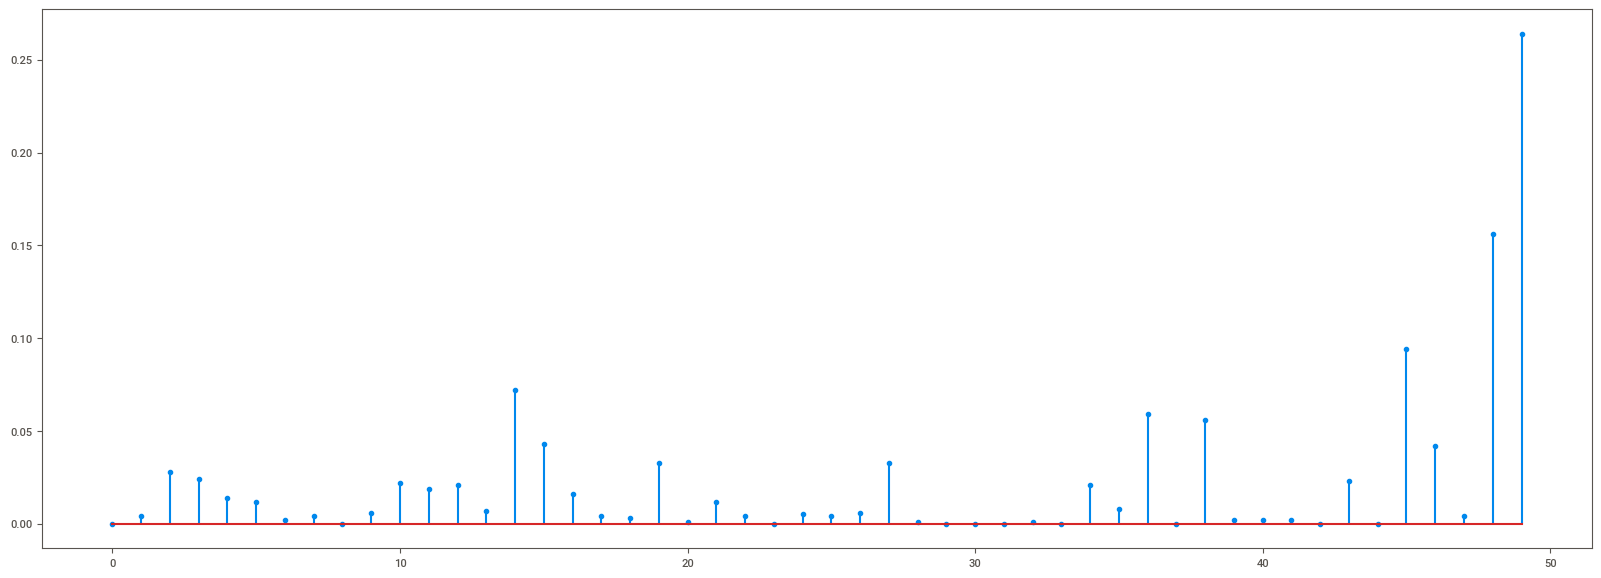

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(49, 0.2639594358675491)

#since cv(cooks distance) <1 we can stop the **diagnostics**

In [ ]:
finalmodel=smf.ols("PF~RDS+ST+MS+Adm",data=df2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.34e-27
Time:                        18:12:44   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
ST[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
ST[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDS                0.8060      0.046     17.369      0.000       0.712       0.900
MS                 0.0270      0.017      1.574      0.123      -0.008       0.062
Adm               -0.0270      0.052     -0.517      0.608      -0.132       0.078
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df2.head()

,RDS,Adm,MS,ST,PF
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
new = pd.DataFrame({"RDS":40,"Adm":95,"MS":102,"ST":"Florida"},index=[1])

In [ ]:
new

,RDS,Adm,MS,ST
1,40,95,102,Florida


In [ ]:
finalmodel.predict(new)

1    50356.560085
dtype: float64

In [ ]:
finalmodel.predict(df2)

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248987
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409934
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505089
22    114833.305137
23    110123.796105
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358948
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232004
48     49123.073082
49     48185.038791


In [ ]:
finalmodel.predict(df2)

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248987
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409934
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505089
22    114833.305137
23    110123.796105
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358948
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232004
48     49123.073082
49     48185.038791


In [ ]:
finalmodel.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101013
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039934
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485089
22    -4481.055137
23    -1389.806105
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438948
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163825
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502004
48   -13449.663082
49   -33503.638791
dtype: float64